In [30]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

In [31]:
# Use Pandas to import the data from "fcc-forum-pageviews.csv". Set the index to the date column.
df = pd.read_csv('../exercicio4/fcc-forum-pageviews.csv')
df.set_index('date', inplace=True)
df.head()

,value
date,
2016-05-09,1201
2016-05-10,2329
2016-05-11,1716
2016-05-12,10539
2016-05-13,6933


In [32]:
# Clean the data by filtering out days when the page views were in the top 2.5% of the dataset or bottom 2.5% of the dataset.
df = df[
    (df['value'] >= df['value'].quantile(0.025)) &
    (df['value'] <= df['value'].quantile(0.975))
]

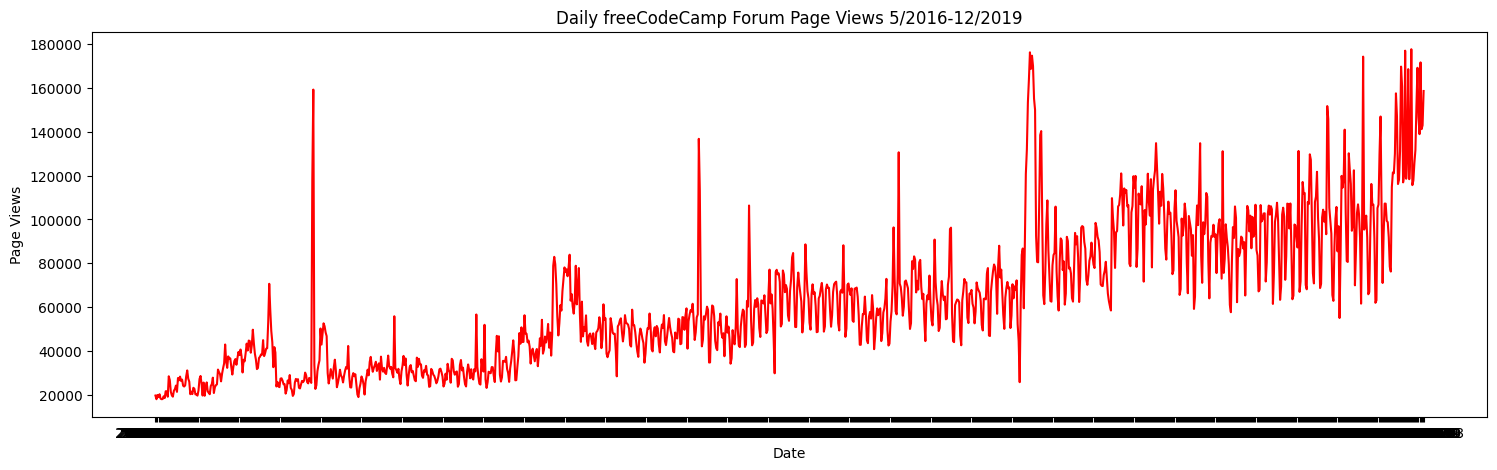

In [33]:
# Create a draw_line_plot function that uses Matplotlib to draw a line chart similar to "examples/Figure_1.png". The title should be Daily freeCodeCamp Forum Page Views 5/2016-12/2019. The label on the x axis should be Date and the label on the y axis should be Page Views.
def draw_line_plot():
    plt.figure(figsize=(18, 5))
    plt.plot(df.index, df['value'], color='red', linestyle='-') 
    plt.title('Daily freeCodeCamp Forum Page Views 5/2016-12/2019')
    plt.xlabel('Date')
    plt.ylabel('Page Views')
    plt.show()

draw_line_plot()

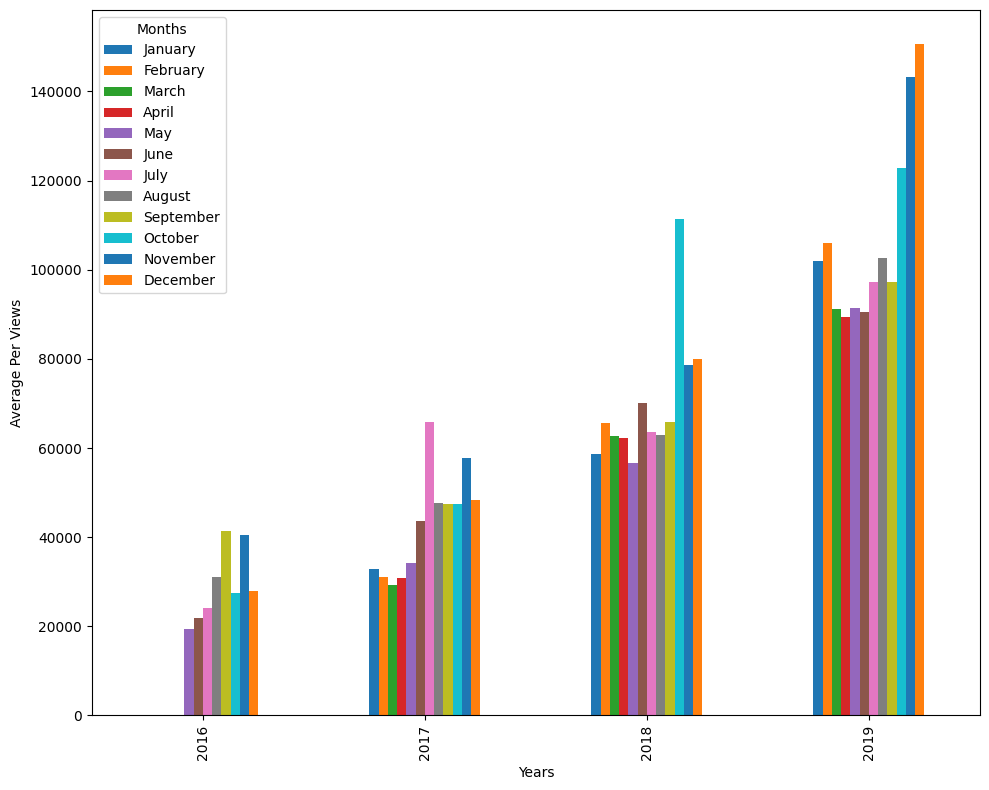

In [34]:
# Create a draw_bar_plot function that draws a bar chart similar to "examples/Figure_2.png". It should show average daily page views for each month grouped by year. The legend should show month labels and have a title of Months. On the chart, the label on the x axis should be Years and the label on the y axis should be Average Page Views.

def draw_bar_plot():
    df['date'] = pd.to_datetime(df.index)
    df['year'] = df['date'].dt.year
    df['month'] = df['date'].dt.month

    df_bar = df.groupby(['year', 'month'])['value'].mean().unstack()

    df_bar.plot(kind='bar', figsize=(10, 8))
    plt.xlabel('Years')
    plt.ylabel('Average Per Views')
    plt.legend(
        title='Months',
        labels=['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
    )
    plt.tight_layout()
    plt.show()

draw_bar_plot()

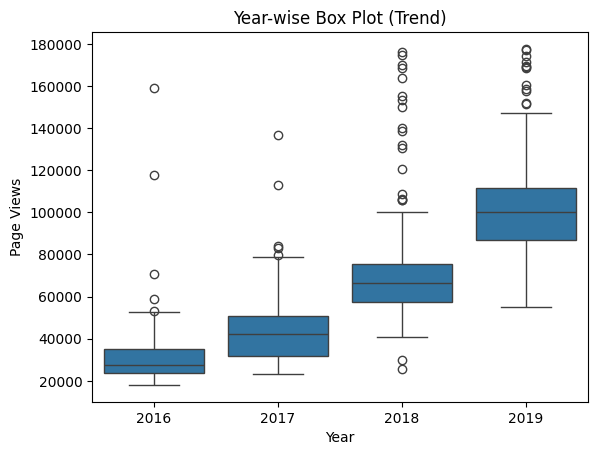

In [35]:
# Create a draw_box_plot function that uses Seaborn to draw two adjacent box plots similar to "examples/Figure_3.png". These box plots should show how the values are distributed within a given year or month and how it compares over time. The title of the first chart should be Year-wise Box Plot (Trend) and the title of the second chart should be Month-wise Box Plot (Seasonality). Make sure the month labels on bottom start at Jan and the x and y axis are labeled correctly. The boilerplate includes commands to prepare the data.

def draw_box_plot():
    df['date'] = pd.to_datetime(df.index)
    df['year'] = df['date'].dt.year
    df['month'] = df['date'].dt.month
    
    sns.boxplot(x=df['year'], y=df['value'])
    plt.title('Year-wise Box Plot (Trend)')
    plt.xlabel('Year')
    plt.ylabel('Page Views')
    plt.show()

draw_box_plot()


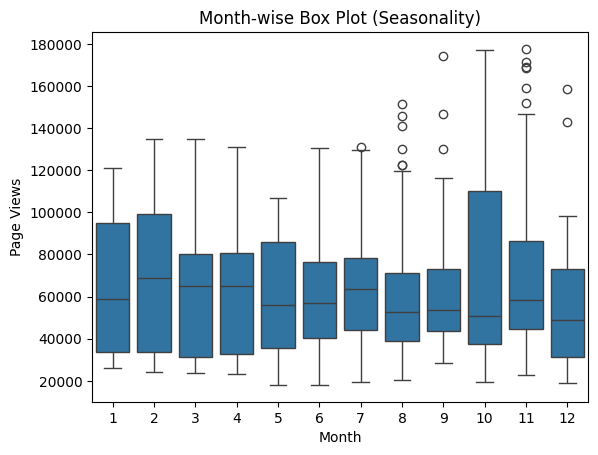

In [36]:
def draw_box_plot1():
    df['date'] = pd.to_datetime(df.index)
    df['month'] = df['date'].dt.month

    sns.boxplot(x=df['month'], y=df['value'])
    plt.title('Month-wise Box Plot (Seasonality)')
    plt.xlabel('Month')
    plt.ylabel('Page Views')
    plt.show()

draw_box_plot1()

C:\Users\Inteli\AppData\Local\Temp\ipykernel_21300\400898838.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_box, x='year', y='value', ax=axes[0], palette='deep')
C:\Users\Inteli\AppData\Local\Temp\ipykernel_21300\400898838.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_box, x='month', y='value', order=month_order, ax=axes[1], palette='deep')


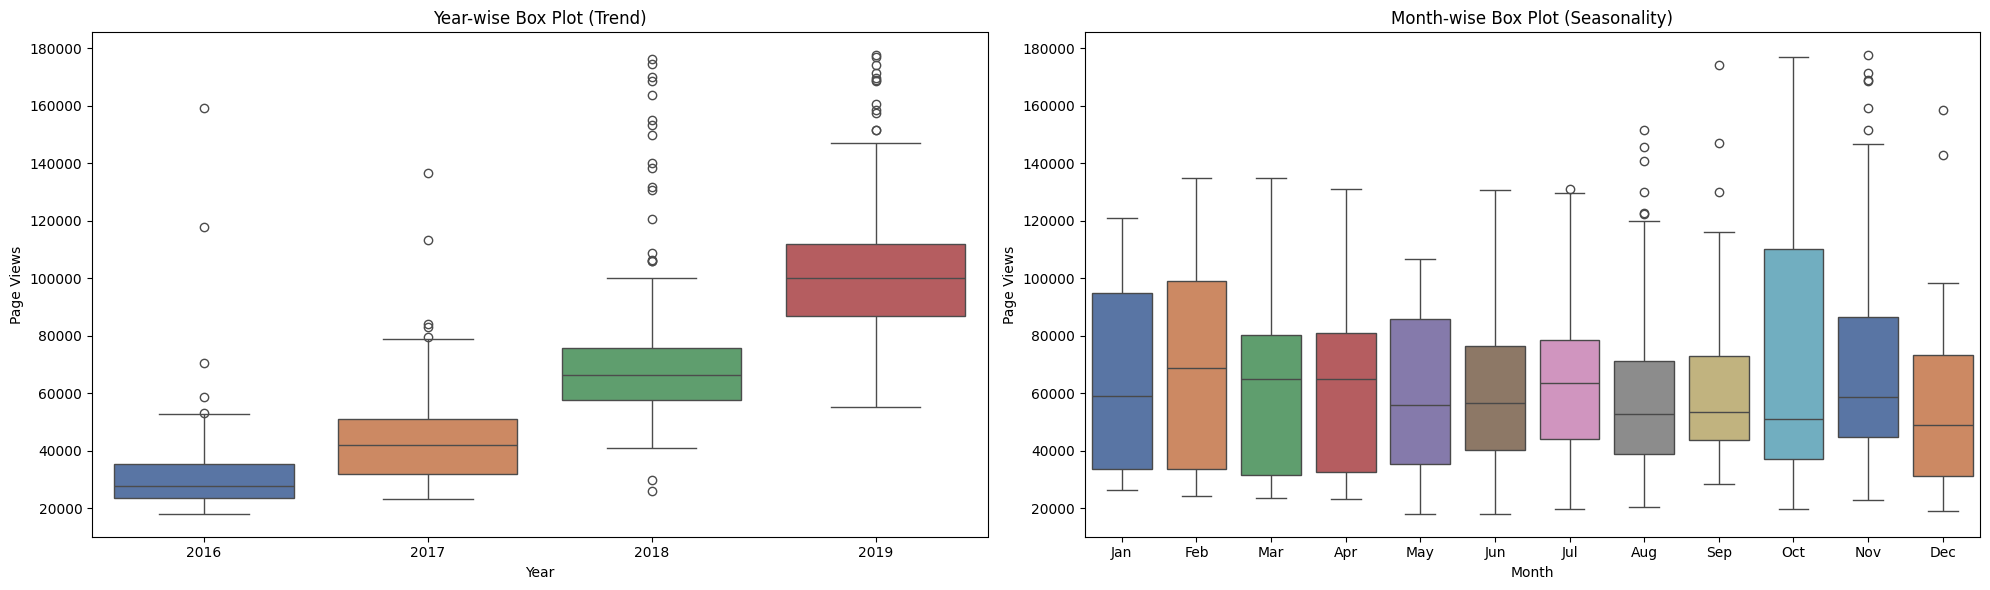

In [37]:
def draw_box_plot():
    df_box = df.copy()

    # Se já existir 'date' como coluna, não reseta; senão, traz do índice
    if 'date' not in df_box.columns:
        df_box.reset_index(inplace=True)
        # Em alguns datasets o reset vem como 'index'; padroniza para 'date'
        if 'index' in df_box.columns:
            df_box.rename(columns={'index': 'date'}, inplace=True)
    # Garante tipo datetime
    df_box['date'] = pd.to_datetime(df_box['date'])

    df_box['year'] = [d.year for d in df_box.date]
    df_box['month'] = [d.strftime('%b') for d in df_box.date]

    # Ordem correta dos meses
    month_order = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']

    # Draw box plots (using Seaborn)
    fig, axes = plt.subplots(1, 2, figsize=(20, 6))

    # Esquerda: Year-wise (Trend)
    sns.boxplot(data=df_box, x='year', y='value', ax=axes[0], palette='deep')
    axes[0].set_title('Year-wise Box Plot (Trend)')
    axes[0].set_xlabel('Year')
    axes[0].set_ylabel('Page Views')

    # Direita: Month-wise (Seasonality)
    sns.boxplot(data=df_box, x='month', y='value', order=month_order, ax=axes[1], palette='deep')
    axes[1].set_title('Month-wise Box Plot (Seasonality)')
    axes[1].set_xlabel('Month')
    axes[1].set_ylabel('Page Views')

    fig.tight_layout()
    plt.close()

    # Save image and return fig (don't change this part)
    fig.savefig('box_plot.png')
    return fig

draw_box_plot()

In [40]:
def draw_box_plot():
    # Prepare data for box plots (this part is done!)
    df_box = df.copy()
    df_box.reset_index(inplace=True)
    df_box['year'] = [d.year for d in df_box.date]
    df_box['month'] = [d.strftime('%b') for d in df_box.date]

    # Draw box plots (using Seaborn)
    fig, axes = plt.subplots(1, 2, figsize=(20, 6))

    sns.boxplot(data=df_box, x='year', y='value', ax=axes[0])
    axes[0].set_title('Year-wise Box Plot (Trend)')
    axes[0].set_xlabel('Year')
    axes[0].set_ylabel('Page Views')

    sns.boxplot(data=df_box, x='month', y='value', order=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], ax=axes[1])
    axes[1].set_title('Month-wise Box Plot (Seasonality)')
    axes[1].set_xlabel('Month')
    axes[1].set_ylabel('Page Views')


    # Save image and return fig (don't change this part)
    fig.savefig('box_plot.png')
    return fig

draw_box_plot()

ValueError: cannot insert date, already exists